In [19]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import os

**DATA PROCESSING**

In [20]:
def extract_column_range(input_file, output_file, start, end):
    data = pd.read_excel(input_file)

    start_index = data.columns.get_loc(start)
    end_index = data.columns.get_loc(end)
    columns_to_delete_after = data.columns[start_index: end_index]

    data.drop(columns=columns_to_delete_after, inplace=True)

    end_index = data.columns.get_loc(end)
    columns_to_delete_after = data.columns[end_index + 1:]

    data.drop(columns=columns_to_delete_after, inplace=True)


    data.to_excel(output_file, index=False)

Extracting columns related to our indicator variouble from groundwater quality file

In [21]:
extract_column_range('gwq.xlsx', 'gwq_potassium.xlsx', 'arsenic', 'potassium')

Extracting relevant columns from gini file

In [22]:
extract_column_range('gini.xlsx', 'gini_potassium.xlsx', 'Literacy', 'Gini')

Merging gini and groundwater quality file based on district

In [23]:
# Load 
gini_df = pd.read_excel('gini_potassium.xlsx')
gwq_df = pd.read_excel('gwq_potassium.xlsx')

# Merge
merged_df = pd.merge(gini_df, gwq_df, on='district')

# Save
merged_df.to_excel('merged_data.xlsx', index=False)

Capitalizing the words in the merged file 

In [24]:
def capitalize_excel_content(file_path, output_file_path):
    
    with pd.ExcelWriter(output_file_path, engine='openpyxl') as writer:
        data = pd.read_excel(file_path, sheet_name=None)

        
        for sheet_name, df in data.items():
            # 'str.upper' to capitalize all string data in the DataFrame
            df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)
            df.to_excel(writer, sheet_name=sheet_name, index=False)


input_file = 'merged_data.xlsx'
output_file = 'merged_new.xlsx'
capitalize_excel_content(input_file, output_file)


C:\Users\komal\AppData\Local\Temp\ipykernel_17252\187985801.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


Converting GDP tables to same base year

Table 1 and 2

In [25]:
# Load the GDP data from the provided Excel files
gdp_base_04 = pd.read_excel('gdp_04.xlsx')
gdp_base_99 = pd.read_excel('gdp_99.xlsx')

# Extract GDP data for the year 2004-05 from both datasets
gdp_2004_base04 = gdp_base_04[gdp_base_04['YEAR'].str.contains('2004-05')].drop('YEAR', axis=1).reset_index(drop=True)
gdp_2004_base99 = gdp_base_99[gdp_base_99['YEAR'].str.contains('2004-05')].drop('YEAR', axis=1).reset_index(drop=True)

# Ensure both dataframes have comparable columns
common_states = gdp_2004_base04.columns.intersection(gdp_2004_base99.columns)

# Calculate the conversion factors for each state
conversion_factors = gdp_2004_base04.loc[0, common_states] / gdp_2004_base99.loc[0, common_states]

# Apply the conversion factors to adjust all values in the 1999-00 base year table
gdp_adjusted_to_200405 = gdp_base_99[common_states].multiply(conversion_factors, axis='columns')
gdp_adjusted_to_200405['YEAR'] = gdp_base_99['YEAR']  # Retain the year for reference

# Merge the adjusted GDP dataset with the original 2004-05 base year dataset
merged_dataset = pd.concat([gdp_base_04, gdp_adjusted_to_200405], ignore_index=True)
merged_dataset.to_excel('merged_gdp_dataset.xlsx', index=False)


In [26]:
file_path = 'merged_gdp_dataset.xlsx'
data = pd.read_excel(file_path)
data_modified = data[:-1]

# Save the modified data to a new Excel file
output_file_path = 'merged_gdp_dataset.xlsx'
data_modified.to_excel(output_file_path, index=False)

gdp_dataset = pd.read_excel('merged_gdp_dataset.xlsx')

gdp_dataset_sorted = gdp_dataset.sort_values(by='YEAR')
gdp_dataset_cleaned = gdp_dataset_sorted.drop_duplicates()


gdp_dataset_cleaned.to_excel('merged_gdp_dataset.xlsx', index=False)

Table 2 and 3

In [27]:
gdp_11_base_11 = pd.read_excel('gdp_11.xlsx')
gdp_11_base_04 = pd.read_excel('merged_gdp_dataset.xlsx')

# Extract GDP data for the year 2011-12 from both datasets
gdp_2011_base11 = gdp_11_base_11[gdp_11_base_11['YEAR'].str.contains('2011-12')].drop('YEAR', axis=1).reset_index(drop=True)
gdp_2011_base04 = gdp_11_base_04[gdp_11_base_04['YEAR'].str.contains('2011-12')].drop('YEAR', axis=1).reset_index(drop=True)

# Ensure both dataframes have comparable columns
common_states_2011 = gdp_2011_base11.columns.intersection(gdp_2011_base04.columns)

# Calculate the conversion factors for each state for 2011-12
conversion_factors_2011 = gdp_2011_base11.loc[0, common_states_2011] / gdp_2011_base04.loc[0, common_states_2011]

# Apply the conversion factors to adjust all values in the 2004-05 base year table
gdp_adjusted_to_201112 = gdp_11_base_04[common_states_2011].multiply(conversion_factors_2011, axis='columns')
gdp_adjusted_to_201112['YEAR'] = gdp_11_base_04['YEAR']  # Retain the year for reference

# Merge the adjusted GDP dataset with the original 2011-12 base year dataset
final_merged_dataset = pd.concat([gdp_11_base_11, gdp_adjusted_to_201112], ignore_index=True)

# Save the merged dataset to a new Excel file
final_merged_dataset.to_excel('final_gdp_dataset.xlsx', index=False)



In [28]:
file_path = 'final_gdp_dataset.xlsx'
data = pd.read_excel(file_path)
data_modified = data[:-1]

# Save the modified data to a new Excel file
output_file_path = 'final_gdp_dataset.xlsx'
data_modified.to_excel(output_file_path, index=False)

gdp_dataset = pd.read_excel('final_gdp_dataset.xlsx')

gdp_dataset_sorted = gdp_dataset.sort_values(by='YEAR')
gdp_dataset_cleaned = gdp_dataset_sorted.drop_duplicates()


gdp_dataset_cleaned.to_excel('final_gdp_dataset.xlsx', index=False)

Merging the gdp table with the dataset 

In [29]:


def load_and_transform_gdp(file_path):
    # Load the GDP data
    gdp_df = pd.read_excel(file_path)
    # Convert from wide to long format
    gdp_long_df = gdp_df.melt(id_vars=['YEAR'], var_name='state', value_name='GDP')
    # Extract the starting year from the 'YEAR' column for matching
    gdp_long_df['year'] = gdp_long_df['YEAR'].str.slice(0, 4).astype(int)
    # Ensure state names are in uppercase
    gdp_long_df['state'] = gdp_long_df['state'].str.upper()
    return gdp_long_df[['state', 'year', 'GDP']]  # Exclude 'YEAR' from the returned DataFrame

def process_and_merge_gdp(gdp_files, input_merged_path, output_path):
    # Load and transform all GDP files
    all_gdp_data = pd.concat([load_and_transform_gdp(file) for file in gdp_files], ignore_index=True)
    merged_new_df = pd.read_excel(input_merged_path)
    # Ensure state names in merged_new data are in uppercase
    merged_new_df['state'] = merged_new_df['state'].str.upper()
    
    # Merge the dataframes on 'state' and 'year'
    merged_final_df = pd.merge(merged_new_df, all_gdp_data, on=['state', 'year'], how='left')
    
    # Save the merged dataframe to a new Excel file
    merged_final_df.to_excel(output_path, index=False)


gdp_files = ['final_gdp_dataset.xlsx']  
input_merged_path = 'merged_new.xlsx'  
output_path = 'dataset.xlsx' 


process_and_merge_gdp(gdp_files, input_merged_path, output_path)




**QUESTIONS**

Question - 1

In [30]:
# Loading the dataset to inspect its content and structure
data_path = "dataset.xlsx"
dataset = pd.read_excel(data_path)
dataset.head()


,No.,district,Gini,country,state,year,dyid,potassium,GDP
0,1,SOUTH ANDAMAN,0.33,INDIA,ANDAMAN AND NICOBAR ISLANDS,2000,SOUTH ANDAMAN2000,NaN,1247.388396
1,1,SOUTH ANDAMAN,0.33,INDIA,ANDAMAN AND NICOBAR ISLANDS,2001,SOUTH ANDAMAN2001,NaN,1275.670472
2,1,SOUTH ANDAMAN,0.33,INDIA,ANDAMAN AND NICOBAR ISLANDS,2002,SOUTH ANDAMAN2002,NaN,1411.126730
3,1,SOUTH ANDAMAN,0.33,INDIA,ANDAMAN AND NICOBAR ISLANDS,2003,SOUTH ANDAMAN2003,NaN,1559.979760
4,1,SOUTH ANDAMAN,0.33,INDIA,ANDAMAN AND NICOBAR ISLANDS,2004,SOUTH ANDAMAN2004,1.742308,1619.520972


In [31]:
# Checking for missing values in the relevant columns ('potassium' and 'GDP')
missing_data = dataset[['potassium', 'GDP']].isnull().sum()
missing_data

potassium    3110
GDP            20
dtype: int64

In [32]:
cleaned_data = dataset.dropna(subset=['potassium', 'GDP'])

#dependent variable (GWQ) and the independent variable (SDP)
y = cleaned_data['potassium']
X = cleaned_data['GDP']

# Add a constant term to include an intercept in the regression model
X = sm.add_constant(X)

# OLS regression model
model = sm.OLS(y, X)

#Fitting the model to the data
results = model.fit()

#results
print(results.summary())

mse = results.mse_resid
print("Mean Squared Error: ", mse)

                            OLS Regression Results                            
Dep. Variable:              potassium   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.470
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0110
Time:                        00:20:10   Log-Likelihood:                -21888.
No. Observations:                4691   AIC:                         4.378e+04
Df Residuals:                    4689   BIC:                         4.379e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0480      0.589     28.962      0.0

Question 2

C:\Users\komal\AppData\Local\Temp\ipykernel_17252\736055291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['residuals'] = results.resid


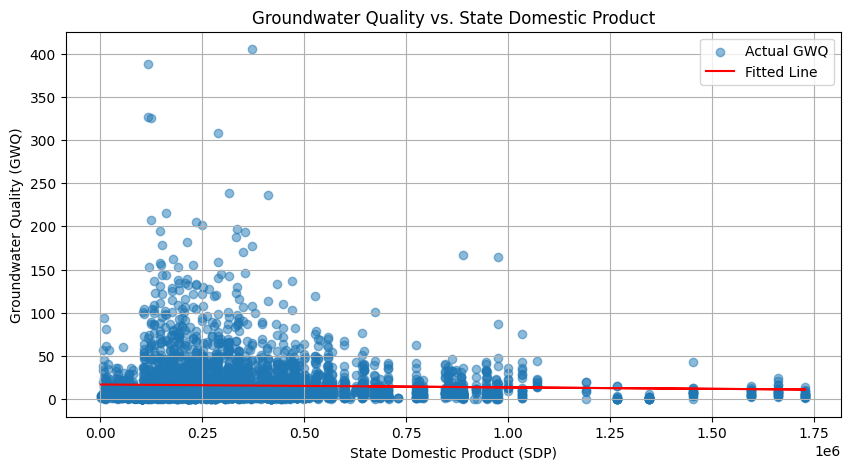

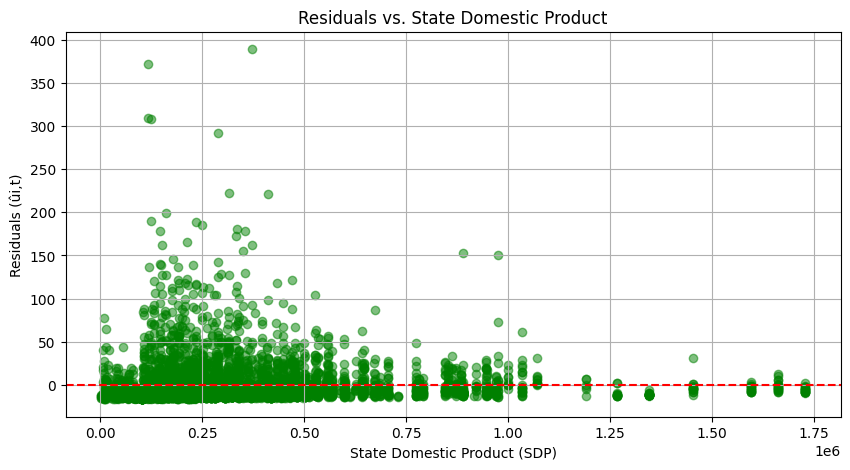

In [33]:
# Calculate the residuals
cleaned_data['residuals'] = results.resid

# Plot 1: GWQ vs SDP with the regression line
plt.figure(figsize=(10, 5))
plt.scatter(cleaned_data['GDP'], cleaned_data['potassium'], alpha=0.5, label='Actual GWQ')
plt.plot(cleaned_data['GDP'], results.fittedvalues, color='red', label='Fitted Line')
plt.title('Groundwater Quality vs. State Domestic Product')
plt.xlabel('State Domestic Product (SDP)')
plt.ylabel('Groundwater Quality (GWQ)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Residuals vs SDP
plt.figure(figsize=(10, 5))
plt.scatter(cleaned_data['GDP'], cleaned_data['residuals'], alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. State Domestic Product')
plt.xlabel('State Domestic Product (SDP)')
plt.ylabel('Residuals (ûi,t)')
plt.grid(True)
plt.show()


Question 3

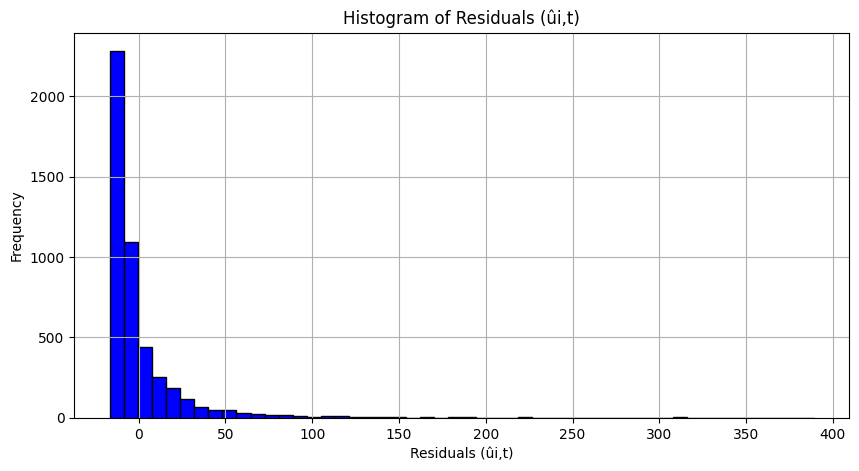

-2.2737367544323206e-12

In [34]:
# Plotting the histogram of the residuals
plt.figure(figsize=(10, 5))
plt.hist(cleaned_data['residuals'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Residuals (ûi,t)')
plt.xlabel('Residuals (ûi,t)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Verification that the sum of the residuals is approximately 0
sum_of_residuals = cleaned_data['residuals'].sum()
sum_of_residuals

Question 4

In [35]:
cleaned_data = dataset.dropna(subset=['Gini'])
cleaned_data['GDP_squared'] = cleaned_data['GDP']**2
cleaned_data['GDP_cubed'] = cleaned_data['GDP']**3

# Independent variables
X = cleaned_data[['GDP', 'GDP_squared', 'GDP_cubed', 'Gini']]

# Dependent variable
y = cleaned_data['potassium']

# Add a constant term to include an intercept in the regression model
X = sm.add_constant(X)

# OLS regression model with cubic GDP and Gini coefficient
enhanced_model = sm.OLS(y, X)

# Fitting the model to the data
enhanced_results = enhanced_model.fit()

# Getting the summary of the regression results
enhanced_summary = enhanced_results.summary()
enhanced_summary_html = enhanced_summary.as_html()

enhanced_summary_html

C:\Users\komal\AppData\Local\Temp\ipykernel_17252\417788470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['GDP_squared'] = cleaned_data['GDP']**2
C:\Users\komal\AppData\Local\Temp\ipykernel_17252\417788470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['GDP_cubed'] = cleaned_data['GDP']**3


MissingDataError: exog contains inf or nans

temp

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'dataset.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to inspect its structure
data.head(), data.columns

cleaned_data = data.dropna(subset=['Gini', 'potassium', 'GDP'])

# Display the shape of the original and cleaned data to see how many rows were dropped
original_shape = data.shape
cleaned_shape = cleaned_data.shape

(original_shape, cleaned_shape)

cleaned_file_path = 'cleaned_data.xlsx'
cleaned_data.to_excel(cleaned_file_path, index=False)

cleaned_file_path

'cleaned_data.xlsx'